In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display_html, display, Math, HTML

# Estimating Proportions

```{margin}
These sections continue to draw extensively on [Think Bayes](https://greenteapress.com/wp/think-bayes) by Allen B. Downey.
```

In our Bayesian work so far, we started with calculating Bayesian updates for individual probabilities. We then shifted to think about Bayesian updates for distributions. We considered the cookie problem with 101 bowls. Each bowl had a different proportion of Vanilla cookies.

Our goal was to estimate which bowl we were drawing from, given a set of cookies obtained from the bowl (ie, the data).

But then we also asked:  what if we had __one__ bowl, and instead we did not know the proportion of cookies in the bowl?

We assume that the proportion of Vanilla cookies could be any value from 0 to 1, with equal probability.

In that case we'd like to estimate that proportion. 

```{margin}
Photo credits: [DALL-E.](https://openai.com/product/dall-e-2) Prompts: "Seven bowls containing differing mixtures of vanilla and chocolate cookies" and "A hand reaching into a ceramic cookie jar"
```

So are these two problems actually the same problem?

<center>
    
<img src="images/DALLE-seven-bowls-containing-differing-mixtures-of-vanilla-and-chocolate-cookies.png" width="400px" style="display: inline-block;"><font size = "6" style="display: inline-block;"> versus </font>  <img src="images/DALLE-a-hand-reaching-into-a-cerarmic-cookie-jar.png" width="400px" style="display: inline-block;">
    
</center>

Yes.   

In both cases what we are really doing is estimating the parameter of a distribution: namely, the parameter $p$ of a Bernoulli distribution, in which the proportion of Vanilla cookies is given by $p$.

Today we will take another step toward Bayesian statistics.  For the first time, we will address a problem in a Bayesian way that we previously addressed in a frequentist way.

In our lecture on [Parameter Estimation](./13-Parameter-Estimation.html#Parameter-Estimation) we considered the problem of estimating the parameter of a distribution.

And prior to that, in our lecture on [Coin Flipping](./04-Frequentism-and-Hypothesis-Testing.html#Coin-Flipping-Through-Both-Lenses:-Bottom-Up), we considered how to estimate the probability that a coin would come up heads in the future given a series of coin flips.

In both of these cases, we previously took a frequentist view.

The frequentist view, in a nutshell, suggests to use the [__Maximum Likelihood Estimate__](13-Parameter-Estimation.html#The-Maximum-Likelihood-Principle) of the parameter, and describe our uncertainty using the notion of a [__confidence interval__](./08-Confidence.html#Confidence).

Today we will see that the Bayesian view treats this same problem in a very different way!

## The Euro Problem (or, Return to Coin Flipping)

In _Information Theory, Inference, and Learning Algorithms,_ David MacKay posed this problem:

"A statistical statement appeared in _The Guardian_ on Friday, January 4, 2002:

> When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110.  'It looks very suspicious to me,' said Barry Blight, a statistics lecturer at the London School of Economics. 'If the coin were unbiased, the chance of getting a result as extreme as that would be less than 7\%.'

"But [MacKay asks] do these data give evidence that the coin is biased rather than fair?"

If the coin is biased, then the probability that it comes up heads is different from $\frac{1}{2}.$

So we can treat spinning the coin as sampling a Bernoulli distribution with an __unknown parameter__ $p$.

It seems reasonable to believe that $p$ depends on physical characteristics of the coin, like the distribution 
 of its weight. If a coin is perfectly balanced, we expect $p$ to be close to 50%, but for a lopsided coin, $p$ might be substantially different. 

### Computing the Posterior

We can go ahead and approach this problem just like the cookie problem.   We can use Bayes’ theorem and the observed data to estimate $p$.

Note that $p$ is a __random variable.__

In [2]:
from scipy.stats import randint
p_dist = pd.DataFrame(index = np.arange(101)/100)

# using a uniform prior distribution
p_dist['probs'] = randint(0, 101).pmf(np.arange(101)) 

In [3]:
likelihood_heads = np.arange(101) / 100
likelihood_tails = 1 - likelihood_heads

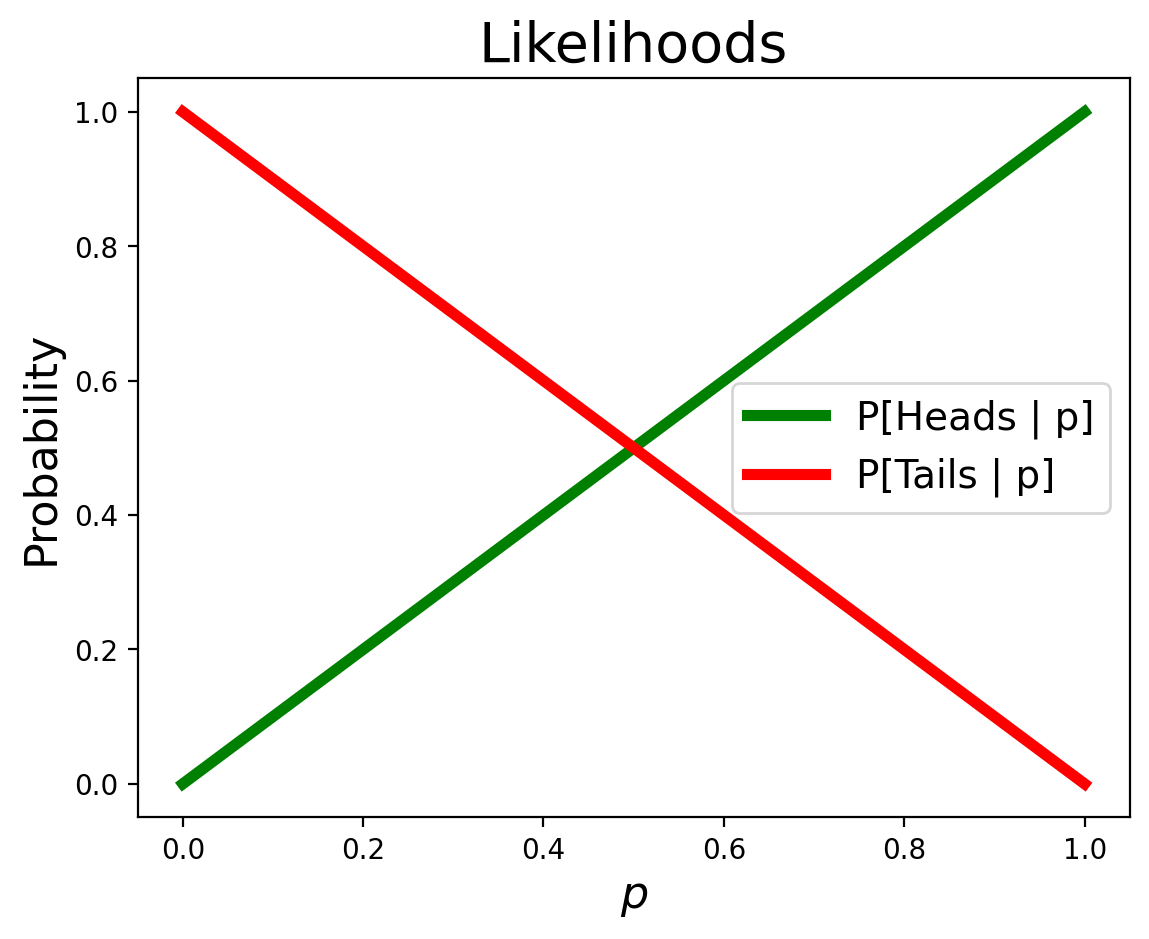

In [4]:
plt.figure()
plt.plot(np.arange(101)/100, likelihood_heads, 'green', label = 'P[Heads | p]', lw = 4)
plt.plot(np.arange(101)/100, likelihood_tails, 'red', label = 'P[Tails | p]', lw = 4)
plt.legend(loc = 'best', fontsize = 14)
plt.xlabel('$p$', size = 16)
plt.ylabel('Probability', size = 16)
plt.title('Likelihoods', size = 20);         

And just as always, we perform a __Bayesian update__ by multiplying the priors by the likelihoods, then normalizing:

$$ P(H\,\vert\,D) = \frac{ P(H) \cdot P(D\,\vert\,H)}{P(D)}. $$

That is:

$$ \text{Posteriors} = \frac{ \text{Priors} \cdot \text{Likelihoods}}{\text{Normalizer}} $$


In [5]:
def update(distribution, likelihood):
    distribution['probs'] = distribution['probs'] * likelihood
    prob_data = distribution['probs'].sum()
    distribution['probs'] = distribution['probs'] / prob_data
    return distribution

Now, let's represent the data from the problem.   There are 140 heads and 110 tails.   It doesn't matter what order they occur in.


In [6]:
data = 'H' * 140 + 'T' * 110
data

'HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT'

In [7]:
prior = p_dist.copy()
for item in data:
    if item == 'H':
        update(p_dist, likelihood_heads)
    elif item == 'T':
        update(p_dist, likelihood_tails)
    else:
        print('Bad data!')

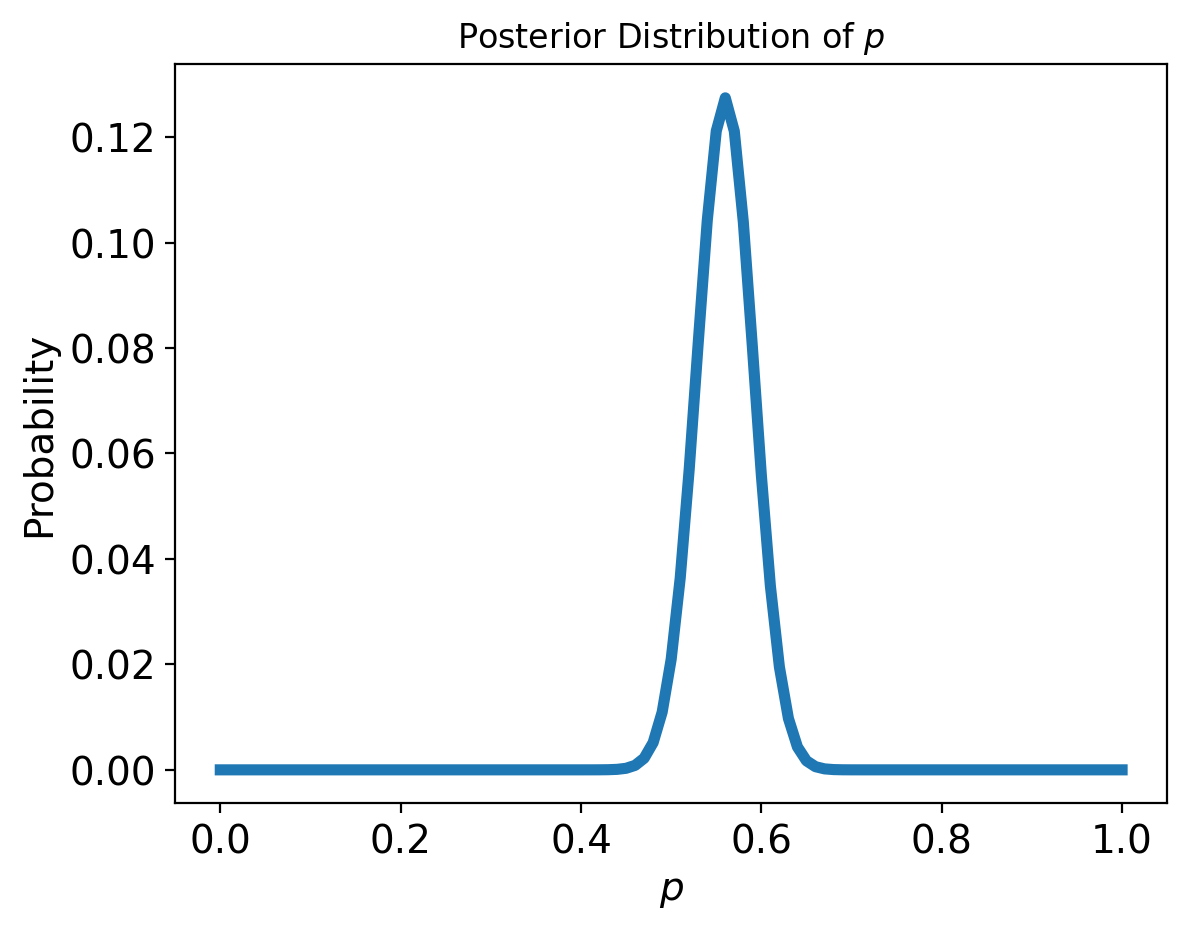

In [8]:
p_dist.plot(lw = 4, legend = False, title = 'Posterior Distribution of $p$', fontsize = 14)
plt.xlabel('$p$', size = 14)
plt.ylabel('Probability', size = 14);

This figure shows the posterior distribution of $p$, which is the proportion of heads for the Euro coin that was spun.

The posterior distribution represents our beliefs about $p$ after seeing the data.  It indicates that the values less than 0.4 and greater than 0.7 are unlikely;  values between 0.5 and 0.6 are most likely.

In fact, the most likely value for $p$, the **MAP** is 0.56 --- which is also the proportion of heads in the dataset, $140/250$.

In [9]:
p_dist['probs'].idxmax()

0.56

Let's recap what we've done here: starting with a prior assumption about the distribution of $p$, we incorporated the available data to form an updated distribution on $p$.   

This new distribution (the posterior) tells us what values of $p$ are likely.  And we can take the most likely value (the maximum a posteriori -- MAP -- estimator) as a point estimate of $p$.

## Exploring Priors

One of most distinctive aspects of Bayesian estimation is that to analyze data, one must start from a prior.

What is the prior, and where does it come from?

Remember that in the Bayesian view, we are using probability to represent our __confidence__ across different hypotheses.

The role of the prior is to represent our level of confidence, or our state of knowledge, __before seeing any data.__   

```{margin}
Photo credits: [DALL-E.](https://openai.com/product/dall-e-2) Prompt: "A person standing behind a large number of bowls filled with cookies with a question mark over his head"
```

<center>

<img src="images/DALLE-a-person-standing-behind-a-large-number-of-bowls-filled-with-cookies-with-a-question-mark-over-his-head.png" width="450px">
    
</center>

In the two examples we've seen so far, we have used a __uniform__ prior:
* In the cookie problem, we assumed that all bowls were equally likely
* In the Euro problem, we assume that each value of $p$ between zero and one is equally likely.

The uniform prior essentially makes no __a priori__ assumption about the values of the parameter being estimated.

For that reason, it is often called the __uninformative__ prior.

However, when you think about it, it is not clear that we want the same prior in the Euro problem that we do in the cookie problem.

In the cookie problem, there is no reason to think that any one bowl is more likely than another (before seeing data).

However, in the Euro problem, do we really think that all values of $p$ are equally likely?

Based on what we know about coins, if a coin is lopsided, $p$ might deviate from $\frac{1}{2}$.   However, it seems unlikely that the Belgian Euro coin is so imbalanced that $p$ might be 0.1 or 0.9.

It might be more reasonable to choose a prior that gives higher probability to values of $p$ near $\frac{1}{2}$ and lower probability to extreme values.

As an example, let's try a triangle-shaped prior.   

In [10]:
triangle_prior = np.append(np.arange(50), np.arange(50, -1, -1))
triangle_prior = triangle_prior / np.sum(triangle_prior)

p_dist_unif = p_dist.copy()
p_dist_tri = pd.DataFrame(index = np.arange(101)/100)
p_dist_tri['probs'] = triangle_prior

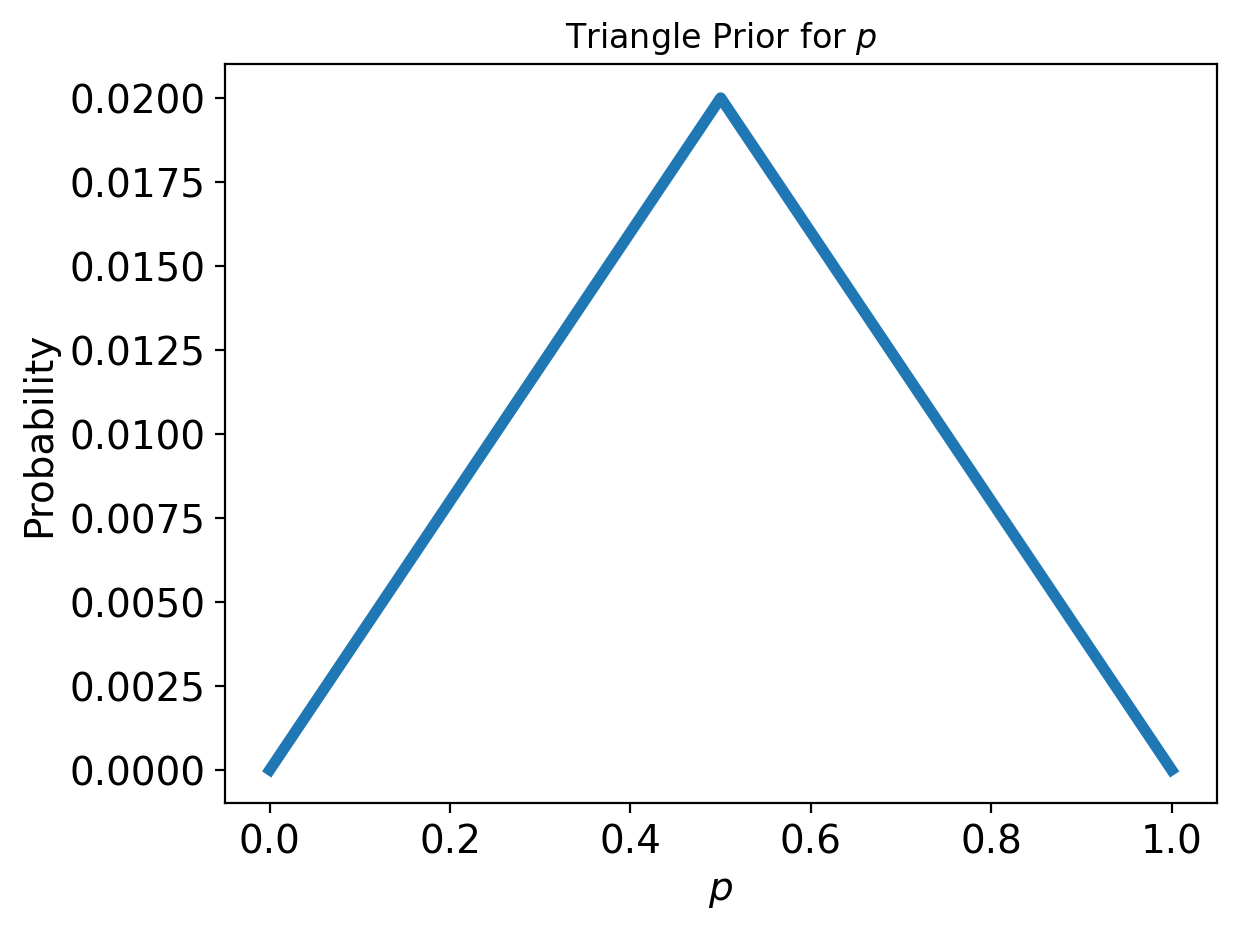

In [11]:
p_dist_tri.plot(lw = 4, legend = False, title = 'Triangle Prior for $p$', fontsize = 14)
plt.xlabel('$p$', size = 14)
plt.ylabel('Probability', size = 14);

Now, let's compute the posterior distribution starting from this prior:

In [12]:
for item in data:
    if item == 'H':
        update(p_dist_tri, likelihood_heads)
    elif item == 'T':
        update(p_dist_tri, likelihood_tails)
    else:
        print('Bad data!')

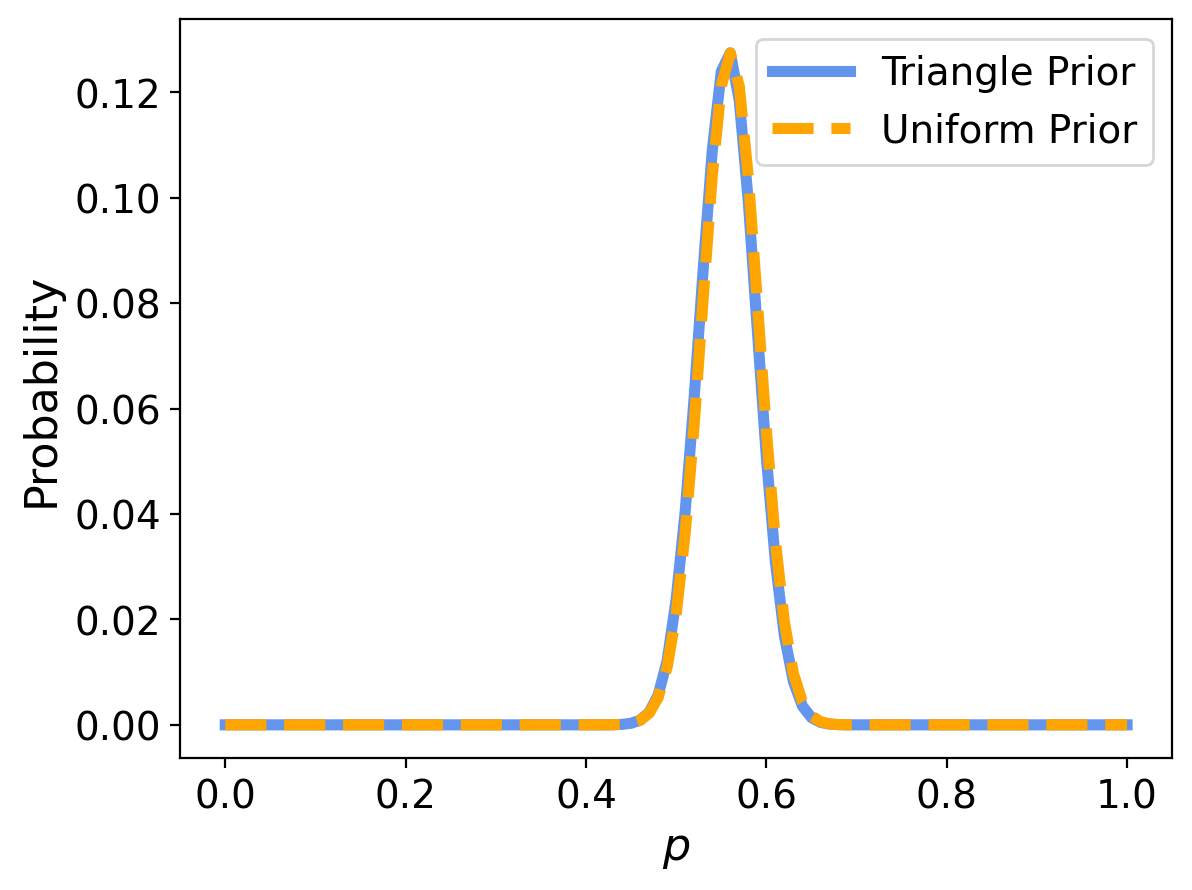

In [13]:
fig, ax = plt.subplots()
p_dist_tri.plot(ax = ax, color = 'cornflowerblue', lw = 4, fontsize = 14)
p_dist_unif.plot(ax = ax, color = 'orange', lw = 4, style = '--', fontsize = 14)
ax.legend(['Triangle Prior', 'Uniform Prior'], fontsize = 14, loc = 'best')
plt.xlabel('$p$', size = 16)
plt.ylabel('Probability', size = 16);

What happened here?

There is no discernable difference between the results using the two priors.

That's good news.  It means that if two individuals had different views of the likelihood of an unbalanced coin (that is, different opinions about the prior on $p$), there is enough data that their different views would not affect their ultimate analysis.

Now, this would not have happened if we only had a small number of observations of the coin.   If we only have a few observations, then different priors can make a difference in the analysis.

However, because we have a large enough dataset (250 observations), the influence of the prior has been lost.

This situation is called __swamping the prior.__   With enough data, people who start with different priors will tend to converge on the same posterior distribution.

## Using the Binomial as a Likelihood

Recall that when we have a parametric distribution function such as

$$ p(x;\theta) $$

that when we think of it as a function of $x$, we say it is a "probability";  but when we think of it as a function of $\theta$ we call it a "likelihood."

For example, consider the [Binomial Distribution:](./02-Distributions.html#the-binomial-distribution)

$$P(k\text{ successes in }n\text{ trials}) = \binom{n}{k}\; p^k\; (1-p)^{n-k}.$$

As a function of $k$, this is a probability, but as a function of $p$, this is a likelihood.

Now, in the Euro problem we have so far been computing the likelihood of each individual coin flip, and therefore performing 250 Bayesian updates.

This is logically correct, but it can be more insightful to ask: "What is the likelihood of the __entire dataset__?"

That is, what is the likelihood of obtaining 140 heads in 250 trials, as a function of $p$?

Of course, this value is also given by the Binomial, but considering that formula as a function of $p$.

Hence, we can more insightfully (and efficiently) compute the posterior as follows:

For each value of $p$ (ie, for each hypothesis $H$), apply Bayes's Rule:

$$ P(H\,\vert\,D) = \frac{ P(H) \cdot P(D\,\vert\,H)}{P(D)}. $$

However, now $D$ represents the __entire dataset__.

So

$$ \text{Posterior for }p = \frac{ \text{Prior for }p \cdot \text{Likelihood of Entire Dataset given } p}{\text{Normalizer}} $$

So

$$ P(p\,\vert\,\text{Data}) = \frac{ \text{Prior for }p \cdot \text{Binomial}_p(140, 250)}{\text{Normalizer}} $$

Note that by considering the entire dataset at once, we can get our final result using only a single Bayesian update.

Here it is:

In [14]:
# restart with uniform prior
p_dist['probs'] = randint(0, 101).pmf(np.arange(101)) 

from scipy.stats import binom

# compute whole-data likelihoods
likelihood = [binom.pmf(140, 250, p) for p in p_dist.index]

update(p_dist, likelihood);

And as expected, we get the same posterior as before:

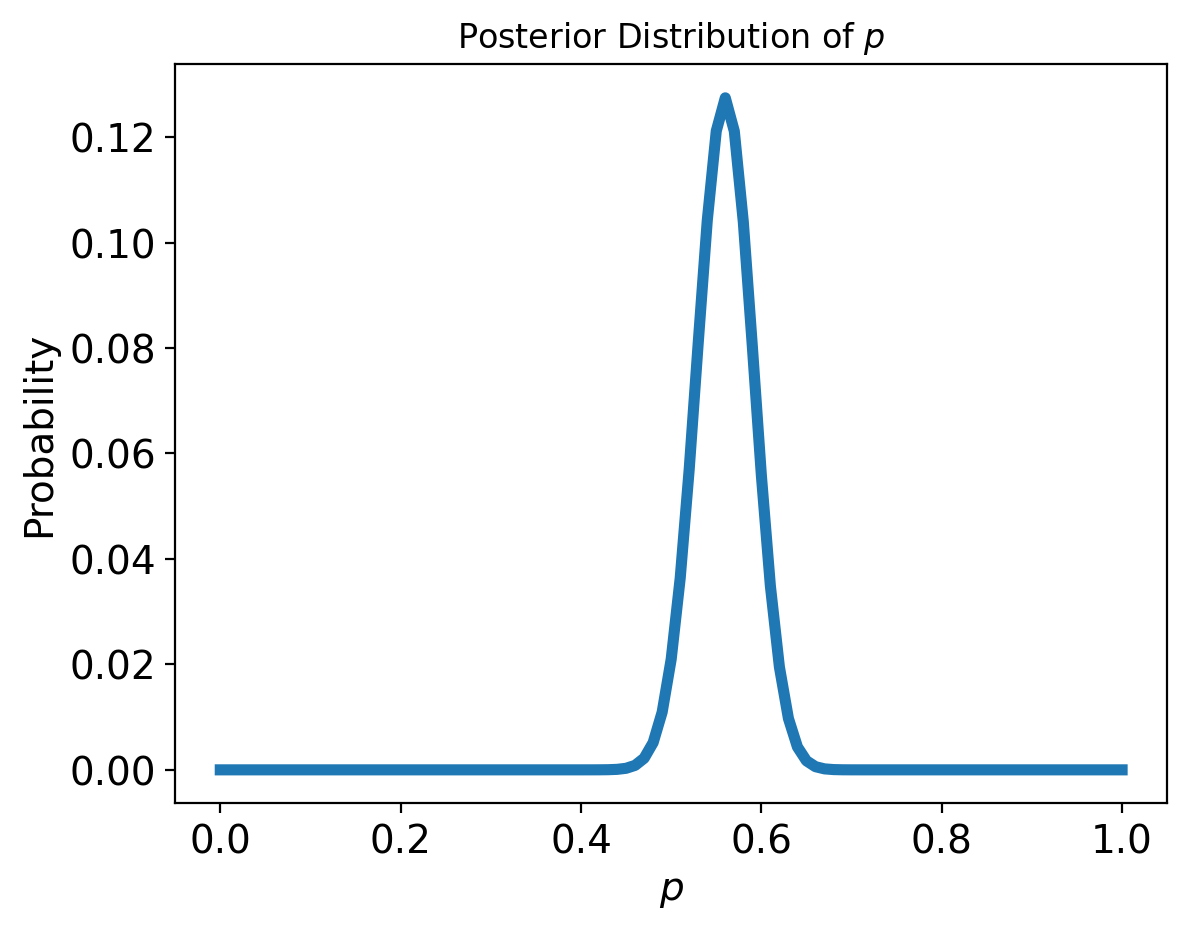

In [15]:
p_dist.plot(lw = 4, legend = False, title = 'Posterior Distribution of $p$', fontsize = 14)
plt.xlabel('$p$', size = 14)
plt.ylabel('Probability', size = 14);

```{margin}
Following the discussion in [Think Bayes](https://greenteapress.com/wp/think-bayes) by Allen B. Downey.
```

## Bayesian Statistics

As mentioned, there are similarities between the Euro problem and the 101 Bowls Problem.

The prior distributions are the same, the likelihoods are the same, and with the same data the results would be the same.
But there are two differences.

The first is the choice of the prior.
With 101 bowls, the uniform prior is implied by the statement of the problem, which says that we choose one of the bowls at random with equal probability.

In the Euro problem, the choice of the prior is subjective; that is, reasonable people could disagree, maybe because they have different information about coins or because they interpret the same information differently.

Because the priors are subjective, the posteriors are subjective, too.

Some people find that problematic, while others argue that it more accurately reflects the nature of statistical decisionmaking.

The other difference is the nature of what we are estimating.

The classical, or frequentist interpreation of probability is based on the notion of [independent trials under identical conditions](01-Intro-Probability-Review.html#The-Frequentist-View).  In that setting, the data is a random sample of some fixed (but unknown) distribution.

In the Bayesian interpretation of probability, the data is not random, but the parameters of the distribution are random.  In the Bayesian setting we use probability to express our confidence about the parameters of the distribution.

```{margin}
Bayesian statistics is surprisingly controversial.

Historically, many people have been bothered by its subjectivity and its use of probability for things that are not random.

This history is covered well in Sharon Bertsch McGrayne's book, *[The Theory That Would Not Die](https://yalebooks.yale.edu/book/9780300188226/theory-would-not-die)*.
```

Note that under the Bayesian interpretation of probability, it is meaningful and useful to treat physical quantities __as if__ they were random, and compute probabilities about them.

We can do this because the laws of probability turn out to be good rules for updating beliefs.

In the Euro problem, the prior distribution represents what we believe about coins in general and the posterior distribution represents what we believe about a particular coin after seeing the data.

The subjectivity of the prior and the interpretation of the posterior are key differences between using Bayes's Theorem and doing Bayesian statistics.